# Lab09 - Climate Models, Parameter Sensitivity and Spaghetti Plots 
**COMP130 - Introduction to Computing**  
**Dickinson College**  

### Names:

### Climate Models

We have all heard of global warming or climate change and have seen different projections regarding the how much the global temperature will increase in the coming decades.  These projections are based on computer simulations of [climate models](https://www.climate.gov/maps-data/primer/climate-models).  In this lab, you will learn a little about what goes into a climate model and experiment [SimMod](http://berkeleyearth.org/simmod-a-simple-python-based-climate-model/), which is one such model.  SimMod is a "simple Python based climate model" created by Zeke Hausfather at the [Berkeley Earth](http://berkeleyearth.org/) project.  The source code for SimMod that you need for this lab was included in your download, but in case your are curious it is also [available as open source software on GitHub](https://github.com/hausfath/SimMod).

### Greenhouse Gases

Climate models use historic measurements of greenhouse gas emissions and future scenarios of greenhouse gas concentrations in the atmosphere to project temperature changes that may occur in the future. In such models the projected temperature changes are computed by using the historic values and future scenarios in combination with atmospheric physics equations. For this lab, we will be leaving the atmospheric physics to the SimMod model and focusing our attention on the effects that different scenarios of future greenhouse gas concentrations have on the temperature projections.

Most climate models, SimMod included, consider a variety of greenhouse gases. The most significant of which are:
- Carbon dioxide (CO<sub>2</sub>)
- Methane (CH<sub>4</sub>), and 
- Nitrous oxide (N<sub>2</sub>O)

Thus, our work on this lab will focus around the historical emissions and scenarios for future atmospheric concentrations of these gases.

### CSV Data Files


As just mentioned, SimMod relies on data about past emissions and future scenarios of atmospheric concentrations of CO<sub>2</sub>, CH<sub>4</sub> and N<sub>2</sub>O. SimMod stores this data in the files in the `emissions` folder. In this section we will examine these files and graph the data they contain. This will better prepare us to understand the results we obtain from running climate model simulations with SimMod.

__Q1:__ Using a `Terminal` with the `cd` and `ls` commands find the names of the 5 files that appear in the `emissions` directory.

__Q2:__ The data files in the `emissions` folder all have an extension of `.csv`.  Use your favorite search engined to determine what csv stands for.

__Q3:__ Read a little about the csv format and briefly describe how the data in a csv file is organized. In particular, identify:
- How is the data divided into columns?  
- How are the rows of data separated?

__Q4:__ The file `historical_ghgs.csv` contains historical data on the emissions of the three greenhouse gases that are used by SimMod.  Open the `historical_ghgs.csv` file using a simple text editor (e.g. something like __TextEdit__ on a Mac, __Notepad__ on Windows, or __gedit__ on Linux). Copy the first five rows of the file into the cell below.

__Q5:__ How does the first row (i.e. line) in the file differ from the rest of the rows (i.e. lines) in the file?

__Q6:__ Now, open the `historical_ghgs.csv` file in JupyterLab (Find the file using the finder pane on the left and double click it.) Notice that JupyterLab is smart enough to interpret the csv format, displaying it in neatly labeled columns instead of the *raw* format you saw in the text editor.  

Answer the following questions about this file:
- For what years do does this file contain data?
- How much carbon was emitted in 1772?
- How much methane was emitted in 1783?
- How much nitrous oxide was emited in 1850?

__Q7:__ It is usually easier to interpret _time series_ data like this using a graph than it is by looking at a table.  So let's load it into a Python program and create a graph.  

The Numerical Python package (`numpy` - which is fun to say!) contains a routine that makes it easy to read data from a file csv file into a program.  We can then use the `matplotlib.pyplot` package that we have used before to graph it.  The program below generates a graph of the carbon emissions from `historical_ghgs.cvs`.  

Run the program below to display the graph.  

If you see a line like `<Figure size 640x480 with 1 Axes>` instead of a graph, try running the cell again.

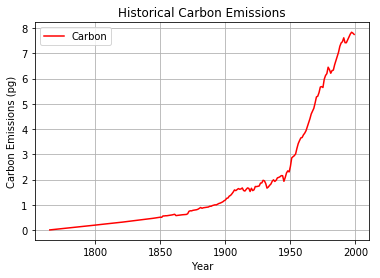

In [19]:
import numpy
from matplotlib.pyplot import *

cyear,c = numpy.loadtxt('emissions/historical_ghgs.csv', usecols=(0,1), delimiter=',', skiprows=1, unpack=True)

plot(cyear, c, 'r-', label='Carbon')  # Plot c vs cyear using a red line.

legend(loc='upper left')              # Add a legend to the graph.
title("Historical Carbon Emissions")  # Set the title for the plot.
xlabel("Year")                        # Label the x axis.
ylabel("Carbon Emissions (pg)")       # Label the y axis.
grid(True)                            # Turn on the grid lines.
show()                                # Make the graph show up in the notebook.

Now let's pick the above program apart a little bit to understand how it works so that you will be able to create additional graphs as you move through the lab.  

The statement below is the one that reads the data from the csv file into the program:

- `cyear,c = numpy.loadtxt('emissions/historical_ghgs.csv', usecols=(0,1), delimiter=',', skiprows=1, unpack=True)`

Now let's pull apart that line:
- the variable `cyear` will be assigned the first column of data that is read.
- the variable `c` will be assigned the second column of data that is read.
- the function `numpy.loadtxt` will be called and it will read the data. Its parameters tell it that:
  - the data is to be read from the file `historical_ghgs.csv` in the `emissions` directory.
  - the data should be read from columns 0 and 1 of the file (`usecols=(0,1)`).
  - the columns are separated (i.e. delimited) by commas (`delimiter=','`).
  - one row at the top of the file (i.e. the headers) should be skipped (`skiprows=1`).
  - the data should be _unpacked_ so that:
    - the data from column `0` is assigned to `cyear`, and 
    - the data from column `1` is assigned to `c`.

__Q8:__  That looks like a lot, but usually what you will do with statements like that is to copy and paste and then modify them to suit your purposes. 

Copy the above statement into the cell below and modify it so that it reads the year and the methane (CH<sub>4</sub>) emissions data into variables named `myear` and `ch4`.  

When you think you have it, run the `print` statement in the cell below and check the `ch4` values against those in the `historical_ghgs.csv` to ensure you have it correct.

In [ ]:
print(ch4)

__Q9:__ Using the program under __Q7__ as a model, write a program that creates a graph of the historical methane emissions. Be sure to update all labels and titles as appropriate.

### Representative Concentration Pathways (RCP)

As we just saw the measured historical emissions of CO<sub>2</sub>, CH<sub>4</sub> and N<sub>2</sub>O are contained in the `historical_ghgs.csv` file.  The SimMod climate models also requires a scenario of predicted future atmospheric concentrations of these greenhouse gases in order to do its computations. 

In 2014 the [Intergovernmental Panel on Climate Change (IPCC)](https://www.ipcc.ch/) created four different scenarios for future atmospheric concentrations of these gases.  These scenarios are called [Representative Concentration Pathways](https://en.wikipedia.org/wiki/Representative_Concentration_Pathway) or __RCP__s. 

The four RCPs produced by the IPCC range from pessimistic (the largest increases in greenhouse gases) to more optimistic (the smallest increases).  These scenarios are known by their numbers `2.6`, `4.5`, `6.0` and `8.5` and appear in the appropriately named files in the `emissions` folders.

__Q10:__ Using the programm in __Q7__ as a model, write a program that creates a graph showing the projected CO<sub>2</sub> concentration (`co2_concentration_ppm`) in the atmosphere for each of the four RCP scenarios.  Your program should create a graph with 4 lines, one for each RCP scenario and should include a useful legend.  Hint: Use a separate call to `numpy.loadtxt` to read the data from each RCP file and add a `plot` statement for each one. Adding multiple `plot` statements will draw all of the lines on the same graph.

To make sure your plot is correct, you can compare it to the one on the WikiPedia page for [Representative Concentration Pathways](https://en.wikipedia.org/wiki/Representative_Concentration_Pathway) which shows the same information.

__Q11:__ Based on your graph from __Q10__ which of the four IPCC RCP scenarios is the most optimistic? Which is the most pessimistic?

### SimMod Climate Model Parameters

To run a climate simulation using SimMod we will invoke the `run_simmod` function from the `simmod` module. The `run_simmod` function is a `void` (fruitless) function with the following interface:

```Python
def run_simmod(start_year, end_year, rcp, CS_param, out_file):
    """ Run a climate simulation for the specified range of years using:
         * the given IPCC rcp (e.g. '2.6', '4.5', '6.0' or '8.5')
         * a value for the Climate Sensitivity Parameter (CS_param)
         * and the full path and name of a csv file into which the results will be written.
    """
```

Notice that to invoke the `run_simmod` function we'll need to provide values as arguments for each of its parameters. Some of the parameters are relatively easy to understand:

- `start_year` and `end_year`: These specify the range of years for which to run the simulation.
- `rcp`: the IPCC Representative Concentration Pathway to be used, as a `String` (i.e. one of `'2.6'`, `'4.5'`, `'6.0'` or `'8.5'`).
- `out_file`: the path and filename of a csv file to hold the results (e.g. `'results/rcp8.5.csv'` will put the results in a file named `rcp8.5.csv` inside the `results` directory.)

#### Climate Sensitivity Parameter

The [*Climate Sensitivity Parameter (CSP)*](https://en.wikipedia.org/wiki/Climate_sensitivity) is an _estimated_ value that indicates how many degrees Celsius the temperature is expected to increase if the concentration of CO<sub>2</sub> in the atmosphere doubles. Because the CSP is estimated there is some debate about what value should be used for CSP in climate models.

__Q12:__ Using your favorite search engine research the range of values (in degrees Celsius) that people have proposed for the climate sensitivity parameter (CSP). Use what you find to address the following questions:
- What ranges of values did you find suggested for the CSP?
- What is the smallest value you found?  
- What is the largest value you found?

__Q13:__ Given the values for the CSP you found in __Q11__ select a value to use in your simulation and give a rationale for your choice.

### Running SimMod

__Q14:__ Write a program that imports the `simmod` module and then calls the `run_simmod` function to run a simulation from 1900-2100 using rcp `2.6` with the CSP you chose in __Q13__ and have the results written to the file `results/rcp2.6.csv`.  Note that when you run your program it will take up to a minute or so to run.  Hey... be patient the climate is big!

__Q15:__ Use JupyterLab to open the `results/rcp2.6.csv` file that was created by your program in __Q14__. You will notice that SimMod writes a lot of columns of data into the file. For this lab, we will only be concerned with the columns for the year and the projected change in temperature.
- Which column number (counting from 0) contains the year?
- The projected change in temperature is labeled `t_s`, which column number contains the projected change in temperature?

__Q16:__ Write a program that produces a graph of the projected change in temperature versus the year for your simulation with RCP 2.6.  Be sure that your graph has appropriate labels and titles.

__Q17:__ Write a program that:
- runs a simulation for each of the four RCPs, 
- stores the results for each RCP into a different file in `results` and 
- produces one graph with four lines on it, one for each RCP.  

Be sure that your graph has appropriate labels and titles and a useful legend. Each RCP should also be displayed in a different color and/or line pattern.  

You can find information about line styles and colors for `matplotlib.pyplot` package [here](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html).

__Q18:__ Do some research on-line to find projected temperature changes for the year 2100 for the four IPCC RCP scenarios. What is the range of projected temperature changes that you found have been reported for each RCP?

__Q19:__ How do your results from __Q17__ compare to the results reported by others that you found in __Q18__?

### Parameter Sensitivity and Spaghetti Plots

__Q20:__ Rerun your program from __Q17__ using the smallest value you found for the Climate Sensitivity Parameter (CSP) in __Q12__. Does the projected temperature for the year 2100 change? Does it go up or down? By how much?

__Q21:__ Repeat __Q20__ using the largest value you found for the CSP in __Q12__.

The results in __Q20__ and __Q21__ show that the SimMod climate model is _sensitive_ to the CSP. That is, the value chosen for the CSP affect the results generated by the model. In such cases it is important to understand how sensitive the model is to the parameter. In other words, to know how much changes in the parameter affect the output.

One technique for is to visualize the sensitivity of a model to its parameters using a [Spaghetti Plot](https://www.google.com/search?sxsrf=ACYBGNRBLxBGPGkl5DXu4sA7xrxaQIchAA:1572928450765&q=spaghetti+plot&tbm=isch&source=univ&sa=X&ved=2ahUKEwjUkcKMn9LlAhWFdt8KHeJYABAQiR56BAgKEBA&cshid=1572928491868108&biw=1423&bih=732). You may well have seen spaghetti plots used this way to visualize the sensitivity of models for [forecasting the paths of tropical storms](https://www.youtube.com/watch?v=iHCgNToBIJs).

The basic idea is pretty simple. Just run the model a number of times using different parameter values each time.  Then plot all of the results on the same graph. The variability in the lines gives you an idea of how sensitive the model is to the parameter that was being changed.

__Q22:__ Write a program that uses a `for` loop to run SimMod 10 times for RCP 2.6 using a different randomly selected CSP for each run.  Be sure that:
- The CSP is randomly chosen from the range you found in __Q12__.  
  - We know how to pick a random integer (`randint`) in a range.  But that won't work here because the CSPs are floating point numbers.  So, you'll need to look up how to pick a random floating point number in a range. Use the link on the course home page to find the documentation for the `random` module.
- The output of each run goes into a different file in the `results` folder.
  - Use a counter variable in your `for` loop to generate a name like `results/rcp2.6-1.csv` or `results/rcp2.6-2.csv`, etc. for each of the files.
  
Note: This program will take a few minutes to run.  So you might start by running it for 2 or 3 random CSP values first and check that it is working. Then once you are confident that it is, run it for 10.

__Q23:__ Write a program that uses a `for` loop to create a spaghetti plot of projected temperature change using the ten result files that were created by your program in __Q22__.  Be sure that your plot has appropriate titles and labels.

__Q24:__ Are the temperature change values you found in __Q18__ consistent with the results in your graph in __Q23__?

### Getting those other RCPs (or _Encapsulation and Generalization Applied_)

__Q25:__ Encapsulate the program you wrote in __Q23__ into a function and generalize it so that the RCP to be used can be passed in as an argument.  The parameter should be used to specify the RCP and also in the name of the output files.

__Q26:__ Write a program that calls your function from __Q25__ once for each of the four different RCPs.

__Q27:__ Encapsulate the program you wrote in __Q23__ into a function and generalize it so that the RCP to be used can be passed in as an argument.  Be sure that the plot generated has appropriate titles and labels.

__Q28:__ Write a program that calls your function from __Q27__ to generate a spaghetti plot for each of the four different RCPs.